# DC Extrapolation for Time Domain 

Extrapolates the low frequency points needed for time-domain transformations, when measurement doesn't include DC.

Example:

/home/alex/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/alex/code/scikit-rf/skrf/network.py:2710: RuntimeWarning: Frequency doesn't begin from 0. Step response will not be correct.
  RuntimeWarning


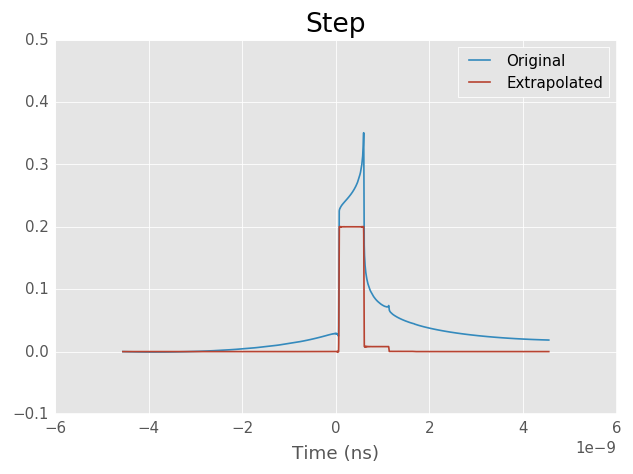

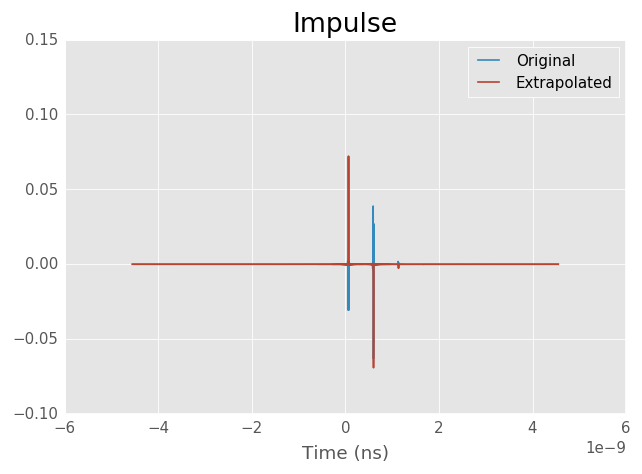

In [1]:
import skrf
import matplotlib.pyplot as plt
skrf.stylely()

freq = skrf.F(0.11,110,1001)
coax1mm = skrf.media.Coaxial(freq, z0=50, Dint=0.44e-3, Dout=1.0e-3, sigma=1e20)

X = coax1mm.line(10, 'mm', z0=50, name='X', embed=True)
Y = coax1mm.line(80, 'mm', z0=75, name='Y', embed=True)
dut = X**Y**X

dut_dc = dut.extrapolate_to_dc(dc_sparam=[[0,1],[1,0]])

plt.figure()
plt.title('Step')
t, y = dut.s11.step_response(pad=2000)
t2, y2 = dut_dc.s11.step_response(pad=2000)
plt.plot(t, y, label='Original')
plt.plot(t2, y2, label='Extrapolated')
plt.legend()
plt.xlabel('Time (ns)')

plt.figure()
plt.title('Impulse')
t, y = dut.s11.impulse_response(pad=2000)
t2, y2 = dut_dc.s11.impulse_response(pad=2000)
plt.plot(t, y, label='Original')
plt.plot(t2, y2, label='Extrapolated')
plt.legend()
plt.xlabel('Time (ns)')

plt.show(block=True)